<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


#  Multi-class Classification


Estimated time needed: **30** mins


In this lab, you will learn the different strategies of Multi-class classification and implement the same on a real-world dataset.


## **Objectives**


After completing this lab you will be able to:


1. Understand the use of one-hot encoding for categorical variables.
2. Implement logistic regression for multi-class classification using **One-vs-All (OvA)** and **One-vs-One (OvO)** strategies.
3. Evaluate model performance using appropriate metrics.


## Import Necessary Libraries


First, to ensure the availability of the required libraries, execute the cell below.


In [20]:
# !pip install numpy==2.2.0
# !pip install pandas==2.2.3
# !pip install scikit-learn==1.6.0
# !pip install matplotlib==3.9.3
# !pip install seaborn==0.13.2

Now, import the necessary libraries for data processing, model training, and evaluation.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## About the dataset
The data set being used for this lab is the "Obesity Risk Prediction" data set publically available on <a href="https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition">UCI Library</a> under the <a href="https://creativecommons.org/licenses/by/4.0/legalcode">CCA 4.0</a> license. The data set has 17 attributes in total along with 2,111 samples. 

The attributes of the dataset are descibed below.


<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg"><thead>
  <tr>
    <th class="tg-7zrl">Variable Name</th>
    <th class="tg-7zrl">Type</th>
    <th class="tg-7zrl">Description</th>
  </tr></thead>
<tbody>
  <tr>
    <td class="tg-7zrl">Gender</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Age</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Height</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">Weight</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl"></td>
  </tr>
  <tr>
    <td class="tg-7zrl">family_history_with_overweight</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Has a family member suffered or suffers from overweight?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAVC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you eat high caloric food frequently?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FCVC</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">Do you usually eat vegetables in your meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NCP</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How many main meals do you have daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CAEC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Do you eat any food between meals?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SMOKE</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you smoke?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CH2O</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How much water do you drink daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">SCC</td>
    <td class="tg-7zrl">Binary</td>
    <td class="tg-7zrl">Do you monitor the calories you eat daily?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">FAF</td>
    <td class="tg-7zrl">Continuous</td>
    <td class="tg-7zrl">How often do you have physical activity?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">TUE</td>
    <td class="tg-7zrl">Integer</td>
    <td class="tg-7zrl">How much time do you use technological devices such as cell phone, videogames, television, computer and others?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">CALC</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">How often do you drink alcohol?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">MTRANS</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Which transportation do you usually use?</td>
  </tr>
  <tr>
    <td class="tg-7zrl">NObeyesdad</td>
    <td class="tg-7zrl">Categorical</td>
    <td class="tg-7zrl">Obesity level</td>
  </tr>
</tbody></table>


### Load the dataset

Load the data set by executing the code cell below.


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/GkDzb7bWrtvGXdPOfk6CIg/Obesity-level-prediction-dataset.csv"
data = pd.read_csv(file_path)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Exploratory Data Analysis


Visualize the distribution of the target variable to understand the class balance.


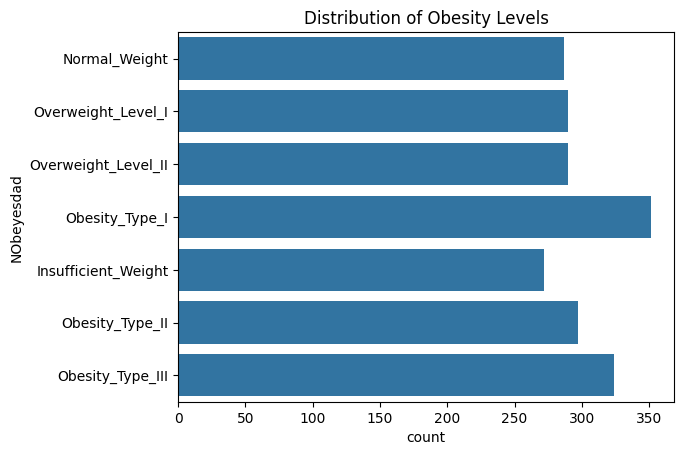

In [3]:
# Distribution of target variable
# 用 Seaborn 绘制一个条形图，展示 obesity level（肥胖等级）的分布情况。
# 因为是 y='...'，所以条形图是 横向的（条形从左到右）， 
# 条形的长度表示该类别在数据集中出现的 样本数量（count）
sns.countplot(y='NObeyesdad', data=data) 
plt.title('Distribution of Obesity Levels')
plt.show()

This shows that the dataset is fairly balanced and does not require any special attention in terms of biased training.


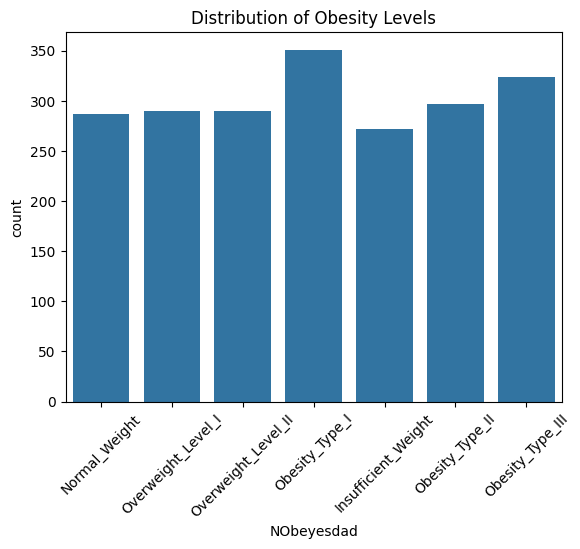

In [4]:
sns.countplot(x='NObeyesdad', data=data)
plt.xticks(rotation=45)  # 避免标签重叠
plt.title('Distribution of Obesity Levels')
plt.show()

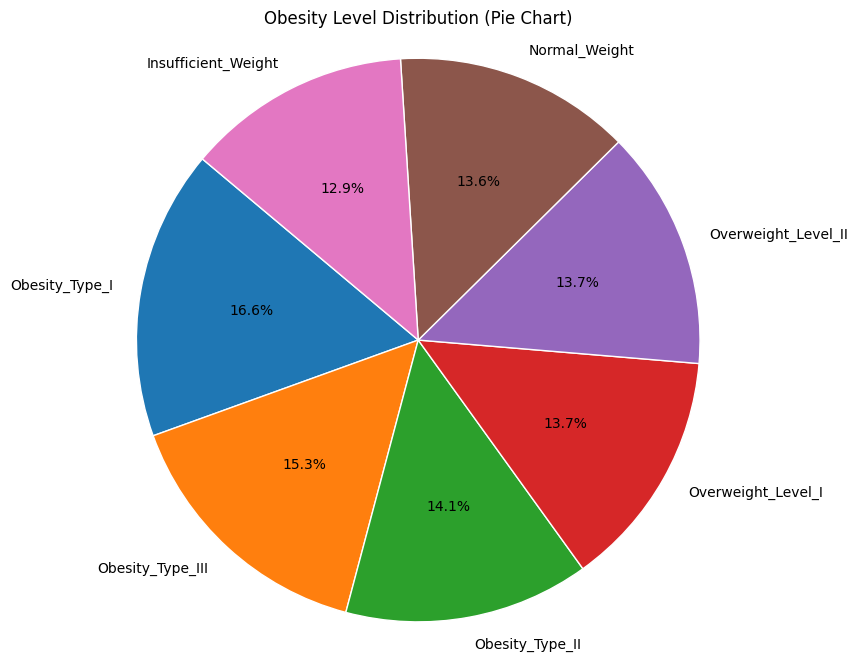

In [5]:
import matplotlib.pyplot as plt

# 统计每个 obesity level 的样本数量
obesity_counts = data['NObeyesdad'].value_counts()

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(
    obesity_counts,
    labels=obesity_counts.index,
    autopct='%1.1f%%',     # 显示百分比
    startangle=140,        # 起始角度
    wedgeprops={'edgecolor': 'white'}  # 加白边更清晰
)
plt.title('Obesity Level Distribution (Pie Chart)')
plt.axis('equal')  # 保持圆形
plt.show()

### Exercise 1
Check for null values, and display a summary of the dataset (use `.info()` and `.describe()` methods).


In [6]:
# Checking for null values
print(data.isnull().sum())

# Dataset summary
print(data.info())
print(data.describe())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height             

<details><summary>Click here for the solution</summary>

```python
# Checking for null values
print(data.isnull().sum())

# Dataset summary
print(data.info())
print(data.describe())
```
</details>


Expected Output:

* Counts of null values for each column (likely zero for this dataset).
* Dataset info including column names, data types, and memory usage.
* Descriptive statistics for numerical columns.


## Preprocessing the data


### Feature scaling
Scale the numerical features to standardize their ranges for better model performance.


In [7]:
# Standardizing continuous numerical features
# 从 data 这个 DataFrame 中，选出所有 float64 类型的列名。 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
# 这些通常就是你要进行标准化的 连续数值型特征。
continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
print(continuous_columns)

# 调用 .fit_transform() 对选出的连续特征列做标准化处理。
# 每一列变成：均值 ≈ 0，标准差 ≈ 1。
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[continuous_columns])

# Converting to a DataFrame
# 把标准化后的NumPy 数组转换为 DataFrame，并给标准化后的数组列贴上原来的名字标签
scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))

# Combining with the original dataset
# 把原来没有标准化的列抛弃，剩下的和标准化后的列合并
scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


Standardization of data is important to better define the decision boundaries between classes by making sure that the feature variations are in similar scales. The data is now ready to be used for training and testing.


### One-hot encoding
Convert categorical variables into numerical format using one-hot encoding.


One-Hot 编码（One-Hot Encoding）是一种将分类变量（categorical variables）转换为数值表示的方法，它的核心思想是：
✅ 用一组 0 和 1 的二进制向量，来表示每一个不同的类别。

🔹 为什么需要 One-Hot 编码？
机器学习算法（尤其是线性模型、神经网络等）不能直接处理文字或字符串，它们只能处理数字。
比如：“Gender” 列有两个类别：Male 和 Female，你不能直接用字符串做模型输入，但可以用：
| Gender | Gender\_Male | Gender\_Female |
| ------ | ------------ | -------------- |
| Male   | 1            | 0              |
| Female | 0            | 1              |

或者，如果你用 drop='first' 省略一个类别（防止线性相关），那就变成：
| Gender | Gender\_Male |
| ------ | ------------ |
| Male   | 1            |
| Female | 0            |

🔍 示例：One-Hot 编码 3 个类别

假设你有一个 Fruit 列：
| Fruit  |
| ------ |
| Apple  |
| Banana |
| Orange |

使用 One-Hot 编码（不 drop）后变成：
| Fruit\_Apple | Fruit\_Banana | Fruit\_Orange |
| ------------ | ------------- | ------------- |
| 1            | 0             | 0             |
| 0            | 1             | 0             |
| 0            | 0             | 1             |

🍡 使用 One-Hot 编码（drop='first'）后：

我们只保留 K-1 个类别（K 是类别总数），假设我们按字母顺序把 Apple 作为第一个类别被 drop 掉。
编码后的结果如下：

| Fruit\_Banana | Fruit\_Orange |             |
| ------------- | ------------- | ----------- |
| 0             | 0             | ← 原来是 Apple |
| 1             | 0             | ← Banana    |
| 0             | 1             | ← Orange    |
| 1             | 0             | ← Banana    |

🧠 解释：
Apple 被默认为 baseline（基准类），所以不编码；
如果两列都是 0 → 表示就是 Apple；
避免虚拟变量陷阱（Dummy Variable Trap），防止特征之间线性相关。

In [8]:
# Identifying categorical columns
categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('NObeyesdad')  # Exclude target column
print(categorical_columns) # ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Applying one-hot encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = encoder.fit_transform(scaled_data[categorical_columns])

# Converting to a DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
# Gender 变成 Gender_Male 0.0/1.0
# family_history_with_overweight 变成 family_history_with_overweight_yes 0.0/1.0
# FAVC 变成 FAVC_yes 0.0/1.0
# CAEC 变成 CAEC_Frequently 0.0/1.0, CAEC_Sometimes 0.0/1.0, CAEC_no 0.0/1.0
# SMOKE 变成 SMOKE_yes 0.0/1.0
# SCC 变成 SCC_yes 0.0/1.0
# CALC 变成 CALC_Frequently 0.0/1.0, CALC_Sometimes 0.0/1.0, CALC_no 0.0/1.0
# MTRANS 变成 MTRANS_Bike 0.0/1.0, MTRANS_Motorbike 0.0/1.0, MTRANS_Public_Transportation 0.0/1.0, MTRANS_Walking

# Combining with the original dataset
prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
print(prepped_data.columns) # 24
print(len(prepped_data.columns)) # 24

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
Index(['NObeyesdad', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF',
       'TUE', 'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_yes', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'],
      dtype='object')
24


You will observe that all the categorical variables have now been modified to one-hot encoded features. This increases the overall number of fields to 24. 


### Encode the target variable


In [9]:
# Encoding the target variable
prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes
prepped_data.head()

,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


1️⃣ astype('category')
把这一列转换为 Pandas 的分类类型（category）。
分类类型会自动识别有哪些唯一类别，并在内部为每个类别分配一个整数编码。

2️⃣ .cat.codes
获取该分类列对应的整数编码（从 0 开始的整数）。
每个不同的肥胖等级（如 Obesity_Type_I, Normal_Weight, etc）会被编码成一个唯一数字。

✅ 示例：
假设 NObeyesdad 原本长这样：
| NObeyesdad           |
| -------------------- |
| Obesity\_Type\_I     |
| Normal\_Weight       |
| Obesity\_Type\_I     |
| Overweight\_Level\_I |

转成 category 后，会生成如下编码：
| NObeyesdad (encoded) |
| -------------------- |
| 2                    |
| 1                    |
| 2                    |
| 0                    |

分类标签顺序（按字母排序）如下：
| 类别名                  | 编号 |
| -------------------- | -- |
| Overweight\_Level\_I | 0  |
| Normal\_Weight       | 1  |
| Obesity\_Type\_I     | 2  |

🧠 这一步为什么重要？
多数 机器学习模型不能接受字符串作为标签（y 值）；
所以需要将目标列（label）转换成数值编码；
比如在 LogisticRegression, RandomForest, XGBoost 训练中非常常见。

### Separate the input and target data


In [10]:
# Preparing final dataset
X = prepped_data.drop('NObeyesdad', axis=1) #  是所有输入特征
print(X) # 打印特征矩阵的列名
y = prepped_data['NObeyesdad'] # 是肥胖等级标签（目标列）

           Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0    -0.522124 -0.875589 -0.862558 -0.785019  0.404153 -0.013073 -1.188039   
1    -0.522124 -1.947599 -1.168077  1.088342  0.404153  1.618759  2.339750   
2    -0.206889  1.054029 -0.366090 -0.785019  0.404153 -0.013073  1.163820   
3     0.423582  1.054029  0.015808  1.088342  0.404153 -0.013073  1.163820   
4    -0.364507  0.839627  0.122740 -0.785019 -2.167023 -0.013073 -1.188039   
...        ...       ...       ...       ...       ...       ...       ...   
2106 -0.525774  0.097045  1.711763  1.088342  0.404153 -0.456705  0.783135   
2107 -0.367195  0.502844  1.800914  1.088342  0.404153 -0.004702  0.389341   
2108 -0.281909  0.541672  1.798868  1.088342  0.404153  0.075361  0.474971   
2109  0.007776  0.404927  1.785780  1.088342  0.404153  1.377801  0.151471   
2110 -0.102119  0.398344  1.790592  1.088342  0.404153  1.396035  0.018996   

           TUE  Gender_Male  family_history_with_overweight_yes

## Model training and evaluation 


### Splitting the data set
Split the data into training and testing subsets.


In [11]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression with One-vs-All
In the One-vs-All approach:
一对多（One-vs-All）方式的逻辑回归：

* The algorithm trains a single binary classifier for each class.
* Each classifier learns to distinguish a single class from all the others combined.
* If there are k classes, k classifiers are trained.
* During prediction, the algorithm evaluates all classifiers on each input, and selects the class with the highest confidence score as the predicted class.

* 算法会为每一个类别训练一个二分类器；
* 每个分类器的目标是将一个类别与“所有其他类别的组合”区分开；
* 如果有 k 个类别，就会训练 k 个分类器；
* 在预测时，算法会对每个输入样本运行所有分类器，并选择置信度最高的分类器对应的类别作为预测结果。

#### Advantages:
* Simpler and more efficient in terms of the number of classifiers (k)
* Easier to implement for algorithms that naturally provide confidence scores (e.g., logistic regression, SVM).

* 相比其他策略，分类器数量少（只需 k 个），因此实现更简单、效率更高；
* 对于那些本身就可以输出置信度得分的算法（如逻辑回归、SVM），更容易实现。

#### Disadvantages:
* Classifiers may struggle with class imbalance since each binary classifier must distinguish between one class and the rest.
* Requires the classifier to perform well even with highly imbalanced datasets, as the "all" group typically contains more samples than the "one" class.

* 每个分类器都需要将一个类别与其余所有类别区分开，这在类别分布不平衡时可能会很困难；
* 因为“其他类别”这一组通常比“当前目标类别”样本数量多很多，所以要求分类器在高度不平衡的数据集上依然表现良好。


Train a logistic regression model using the One-vs-All strategy and evaluate its performance.


In [12]:
# Training logistic regression model using One-vs-All (default)
model_ova = LogisticRegression(multi_class='ovr', max_iter=1000)
model_ova.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'ovr'


You can now evaluate the accuracy of the trained model as a measure of its performance on unseen testing data.


In [13]:
# Predictions
y_pred_ova = model_ova.predict(X_test)

# Evaluation metrics for OvA
print("One-vs-All (OvA) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ova),2)}%")

One-vs-All (OvA) Strategy
Accuracy: 76.12%


### Logistic Regression with OvO
一对一（One-vs-One, OvO）策略的逻辑回归

In the One-vs-One approach:
* The algorithm trains a binary classifier for every pair of classes in the dataset.
* If there are k classes, this results in $k(k-1)/2$ classifiers.
* Each classifier is trained to distinguish between two specific classes, ignoring the rest.
* During prediction, all classifiers are used, and a "voting" mechanism decides the final class by selecting the class that wins the majority of pairwise comparisons.

在 One-vs-One 方法中：
* 算法会为数据集中每一对类别训练一个二分类器；
* 如果有 k 个类别，最终会训练 𝑘(𝑘−1)/2个分类器；
* 每个分类器只学习如何在两个特定类别之间进行区分，忽略其他类别；
* 在预测阶段，所有分类器都会参与投票，哪个类别在所有两两对比中赢得最多票数，就被作为最终的预测结果。

#### Advantages:
* Suitable for algorithms that are computationally expensive to train on many samples because each binary classifier deals with a smaller dataset (only samples from two classes).
* Can be more accurate in some cases since classifiers focus on distinguishing between two specific classes at a time.
* 适用于那些在大样本上训练成本高的算法，因为每个分类器只需要使用来自两个类别的样本，训练数据量较小；
* 在某些情况下更准确，因为每个分类器只专注于区分两个类别，学习任务更明确。

#### Disadvantages:
* Computationally expensive for datasets with a large number of classes due to the large number of classifiers required.
* May lead to ambiguous predictions if voting results in a tie.
* 当类别数量较多时，所需训练的分类器数量剧增，计算代价大；
* 如果投票出现平局，可能导致预测结果不明确或冲突。


Train a logistic regression model using the One-vs-One (OvO) strategy and evaluate its performance.


In [14]:
# Training logistic regression model using One-vs-One
model_ovo = OneVsOneClassifier(LogisticRegression(max_iter=1000))
model_ovo.fit(X_train, y_train)

,estimator,LogisticRegre...max_iter=1000)
,n_jobs,None
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'


Evaluate the accuracy of the trained model as a measure of its performance on unseen testing data.


In [15]:
# Predictions
y_pred_ovo = model_ovo.predict(X_test)

# Evaluation metrics for OvO
print("One-vs-One (OvO) Strategy")
print(f"Accuracy: {np.round(100*accuracy_score(y_test, y_pred_ovo),2)}%")

One-vs-One (OvO) Strategy
Accuracy: 92.2%


### Exercises


Q1. Experiment with different test sizes in the train_test_split method (e.g., 0.1, 0.3) and observe the impact on model performance.


In [17]:
for test_size in [0.1, 0.3]:
    # stratify=y， 让 训练集和测试集中的各个类别的比例 和 原始数据集中的比例保持一致。
    # 如果你不加 stratify=y， train_test_split 会随机拆分数据， 有可能导致某些类别在测试集中严重不足或缺失（尤其是在样本不平衡时）
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    model_ova.fit(X_train, y_train)
    y_pred = model_ova.predict(X_test)
    print(f"Test Size: {test_size}")
    print("Accuracy:", accuracy_score(y_test, y_pred))

Test Size: 0.1
Accuracy: 0.7594339622641509
Test Size: 0.3
Accuracy: 0.749211356466877


<details><summary>Click here for the solution</summary>

```python
for test_size in [0.1, 0.3]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    model_ova.fit(X_train, y_train)
    y_pred = model_ova.predict(X_test)
    print(f"Test Size: {test_size}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
```
</details>


Q2. Plot a bar chart of feature importance using the coefficients from the One vs All logistic regression model. Also try for the One vs One model.


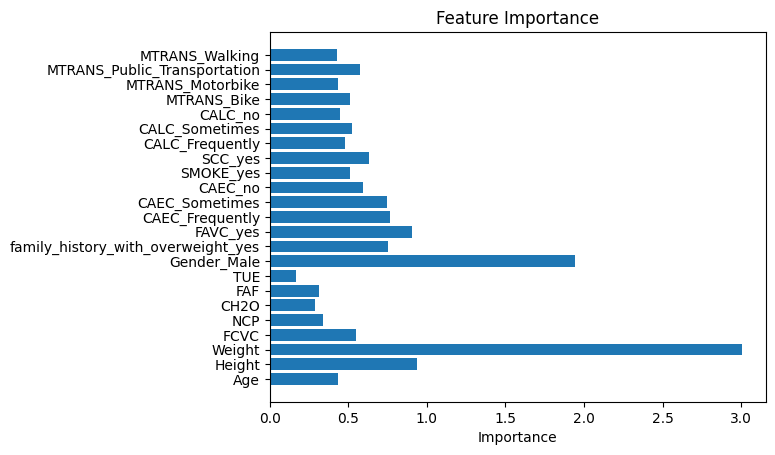

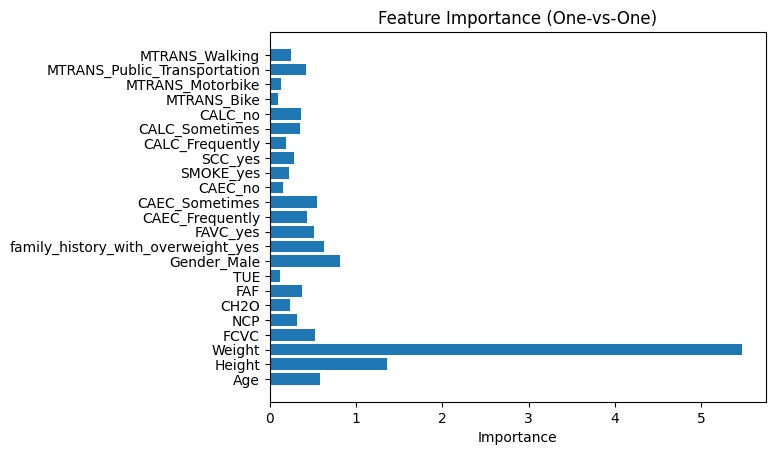

In [20]:
# Feature importance
# model_ova.coef_ 是 OvA 模型中，每个类别对应的逻辑回归系数
# print(model_ova.coef_)
# 对每个特征在所有分类器中的绝对系数，对每一列做操作取平均值，作为该特征整体的重要性
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0) # 得到每列特征值的绝对平均数
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

# For One vs One model
# Collect all coefficients from each underlying binary classifier
# model_ovo.estimators_ 是 OvO 模型中所有的子分类器（共 k(k-1)/2 个）
# 每个 est 是一个逻辑回归分类器, est.coef_ 是形如 [1, n_features] 的数组，表示每个特征的权重
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])

# Now take the mean across all those classifiers
# 跟 OvA 一样，对所有分类器中同一个特征的绝对值系数，对每一列做进行平均，作为该特征的最终重要性
feature_importance = np.mean(np.abs(coefs), axis=0)

# Plot feature importance
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance (One-vs-One)")
plt.xlabel("Importance")
plt.show()

<details><summary>Click here for the solution</summary>

```python
# Feature importance
feature_importance = np.mean(np.abs(model_ova.coef_), axis=0)
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()
```
```python

# For One vs One model
# Collect all coefficients from each underlying binary classifier
coefs = np.array([est.coef_[0] for est in model_ovo.estimators_])

# Now take the mean across all those classifiers
feature_importance = np.mean(np.abs(coefs), axis=0)

# Plot feature importance
plt.barh(X.columns, feature_importance)
plt.title("Feature Importance (One-vs-One)")
plt.xlabel("Importance")
plt.show()
```

</details>


Q3. Write a function `obesity_risk_pipeline` to automate the entire pipeline: <br>
<ol>
<li> Loading and preprocessing the data </li>
<li> Training the model </li>
<li> Evaluating the model </li>
</ol>
The function should accept the file path and test set size as the input arguments.


In [21]:
def obesity_risk_pipeline(data_path, test_size=0.2):
    # Load data
    data = pd.read_csv(data_path)

    # Standardizing continuous numerical features
    continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_columns])
    
    # Converting to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))
    
    # Combining with the original dataset
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

    # Identifying categorical columns
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Exclude target column
    
    # Applying one-hot encoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])
    
    # Converting to a DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
    
    # Combining with the original dataset
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
    
    # Encoding the target variable
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes

    # Preparing final dataset
    X = prepped_data.drop('NObeyesdad', axis=1)
    y = prepped_data['NObeyesdad']
   
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    # Training and evaluation
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Call the pipeline function with file_path
obesity_risk_pipeline(file_path, test_size=0.2)

Accuracy: 0.8794326241134752


<details><summary>Click here for the solution</summary>

```python
def obesity_risk_pipeline(data_path, test_size=0.2):
    # Load data
    data = pd.read_csv(data_path)

    # Standardizing continuous numerical features
    continuous_columns = data.select_dtypes(include=['float64']).columns.tolist()
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(data[continuous_columns])
    
    # Converting to a DataFrame
    scaled_df = pd.DataFrame(scaled_features, columns=scaler.get_feature_names_out(continuous_columns))
    
    # Combining with the original dataset
    scaled_data = pd.concat([data.drop(columns=continuous_columns), scaled_df], axis=1)

    # Identifying categorical columns
    categorical_columns = scaled_data.select_dtypes(include=['object']).columns.tolist()
    categorical_columns.remove('NObeyesdad')  # Exclude target column
    
    # Applying one-hot encoding
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_features = encoder.fit_transform(scaled_data[categorical_columns])
    
    # Converting to a DataFrame
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_columns))
    
    # Combining with the original dataset
    prepped_data = pd.concat([scaled_data.drop(columns=categorical_columns), encoded_df], axis=1)
    
    # Encoding the target variable
    prepped_data['NObeyesdad'] = prepped_data['NObeyesdad'].astype('category').cat.codes

    # Preparing final dataset
    X = prepped_data.drop('NObeyesdad', axis=1)
    y = prepped_data['NObeyesdad']
   
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    # Training and evaluation
    model = LogisticRegression(multi_class='multinomial', max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))

# Call the pipeline function with file_path
obesity_risk_pipeline(file_path, test_size=0.2)
```
</details>


### Congratulations! You're ready to move on to your next lesson!
 
## Author
 
<a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" target="_blank">Abishek Gagneja</a>
 
 
 ### Other Contributors
 
<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>



<!--
## Changelog
 
| Date | Version | Changed by | Change Description |

|:------------|:------|:------------------|:---------------------------------------|

| 2024-11-05 | 1.0  Abhishek Gagnejan    | Fresh version created |
| 2025-05-13 | 1.1  Anita Verma    | Added the solution code for Ovo model Q2  |


<h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
